In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 

df = pd.read_csv('data.csv')
df = df.drop(columns=['Date'])
df.tail(3)

,BTC,ETH,XRP,USDT,BSV,BCH,LTC,EOS,BNB,ADA,BTCTOMORROW
670,10242.35,351.11,0.24,1.0,169.58,224.68,47.90,2.76,24.53,0.09,10363.14
671,10363.14,368.10,0.24,1.0,166.70,227.71,48.72,2.78,24.56,0.10,10400.91
672,10400.91,374.70,0.24,1.0,167.56,225.54,49.09,2.79,25.45,0.10,10442.17


In [2]:
df.isnull().any()

BTC            False
ETH            False
XRP            False
USDT           False
BSV            False
BCH            False
LTC            False
EOS            False
BNB            False
ADA            False
BTCTOMORROW    False
dtype: bool

In [3]:
df = df.fillna(method='ffill')

In [4]:
X = df[['BTC', 'ETH', 'XRP', 'USDT', 'BSV', 'BCH', 'LTC', 'EOS', 'BNB', 'ADA']].values
y = df['BTCTOMORROW'].values

In [5]:
# from sklearn.preprocessing import MinMaxScaler
# cols = df.columns.values
# print (cols)

In [6]:
# Min_max_scaler = MinMaxScaler()
# df[cols] = Min_max_scaler.fit_transform(df[cols])
# df.head()

<AxesSubplot:xlabel='BTCTOMORROW'>

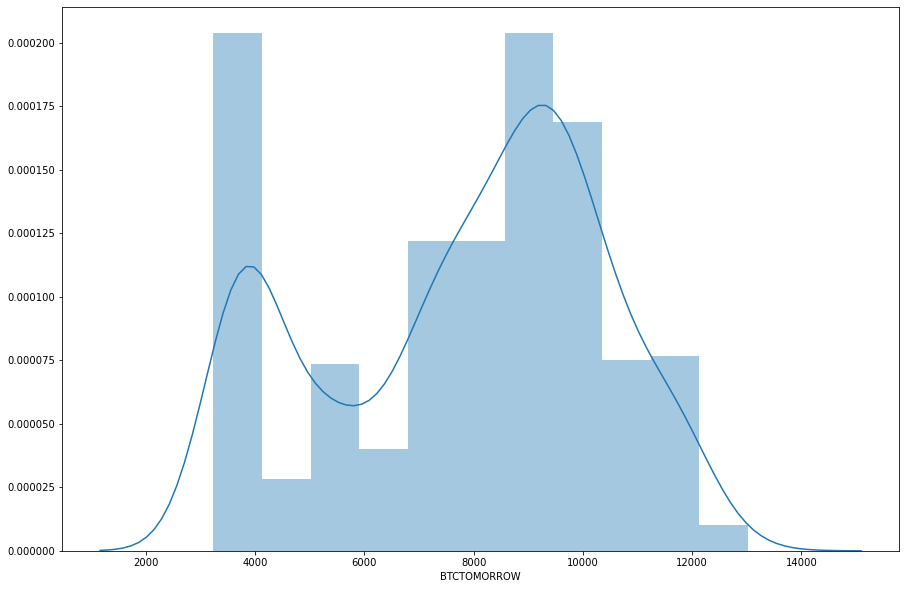

In [7]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['BTCTOMORROW'])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
# model=LinearRegression()

In [10]:
from sklearn import metrics
%matplotlib inline

In [11]:
regressor = LinearRegression()  
model = regressor.fit(X_train, y_train) #training the algorithm
# model.fit(X_train,y_train)

In [12]:
coeff_df = pd.DataFrame(regressor.coef_, ['BTC', 'ETH', 'XRP', 'USDT', 'BSV', 'BCH', 'LTC', 'EOS', 'BNB', 'ADA'], columns=['Coefficient'])  
coeff_df

,Coefficient
BTC,0.944024
ETH,-0.569504
XRP,-715.195538
USDT,-1152.098863
BSV,0.182760
BCH,0.598487
LTC,2.008566
EOS,-76.441421
BNB,11.168182
ADA,2314.936217


In [19]:
# # get importance
# importances = regressor.coef_
# # Normalize the importance values 
# importances = 100.0 * (importances / max(importances))
# # # summarize feature importance
# # for i,v in enumerate(importance):
# # 	print('Feature: %0d, Score: %.5f' % (i,v))
# # # plot feature importance
# # plt.bar([x for x in range(len(importance))], importance)
# # plt.show()
# #Sort feature importances in descending order
# indices = np.argsort(importances)[::-1]

# #Rearrange feature names so they match the sorted feature importances
# names = [df.columns[i] for i in indices]

# #Create plot
# plt.figure()

# #Create plot title
# plt.title("Feature Importance")

# #Add bars
# plt.bar(range(X.shape[1]), importances[indices])

# #Add feature names as x-axis labels
# plt.xticks(range(X.shape[1]), names, rotation=90)

# #Show plot
# plt.show()



In [20]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

1531.8242466964548
[ 9.44024248e-01 -5.69504238e-01 -7.15195538e+02 -1.15209886e+03
  1.82759819e-01  5.98487306e-01  2.00856641e+00 -7.64414209e+01
  1.11681822e+01  2.31493622e+03]


In [21]:
y_pred = regressor.predict(X_test)


In [22]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(3)
df1

,Actual,Predicted
0,8804.48,8617.188257
1,6716.44,6768.209313
2,9889.42,10289.289164


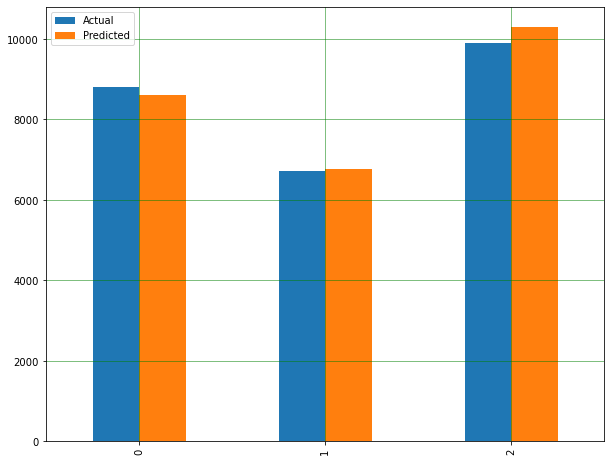

In [23]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [24]:
# The final step is to evaluate the performance of the algorithm.
# We’ll do this by finding the values for MAE, MSE, and RMSE.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 190.39953942512102
Mean Squared Error: 89124.2703075726
Root Mean Squared Error: 298.536882658697


In [25]:
print('R^2 (coefficient of determination) regression score function:', metrics.r2_score(y_test, y_pred))  

R^2 (coefficient of determination) regression score function: 0.9865172512504048
